In [57]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [58]:
# Load and preprocess the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [59]:
# Normalize the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [60]:
# Expand the dimensions to include the channel dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

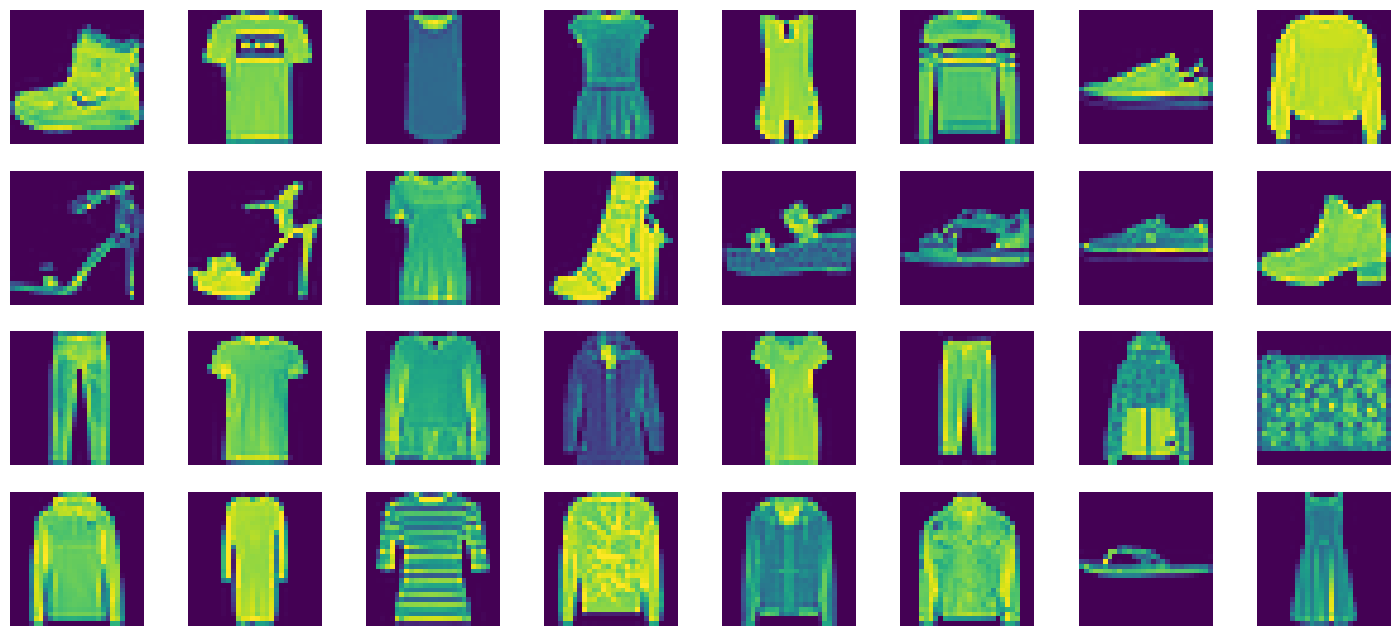

In [61]:
# Sample dataset
plt.figure(figsize=(18, 8))

num_rows = 4
num_cols = 8

# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(x_train[i, :, :])
    plt.axis("off")

In [62]:
# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [63]:
x_train[0].shape

(28, 28, 1)

In [64]:
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(102, activation='relu'),
    layers.Dense(56, activation='relu'),
    layers.Dense(28, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [65]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=256,
                    validation_data=(x_test, y_test))

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.5924 - accuracy: 0.7837 - val_loss: 0.4864 - val_accuracy: 0.8186
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3983 - accuracy: 0.8541 - val_loss: 0.4028 - val_accuracy: 0.8578
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3601 - accuracy: 0.8689 - val_loss: 0.4003 - val_accuracy: 0.8601
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3469 - accuracy: 0.8734 - val_loss: 0.4143 - val_accuracy: 0.8507
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3265 - accuracy: 0.8787 - val_loss: 0.3661 - val_accuracy: 0.8684
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3217 - accuracy: 0.8812 - val_loss: 0.3800 - val_accuracy: 0.8631
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3080 - accuracy: 0.8858 - val_loss: 0.3898 - val_accuracy: 0.8589

In [67]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.5151 - accuracy: 0.8779 - 520ms/epoch - 2ms/step


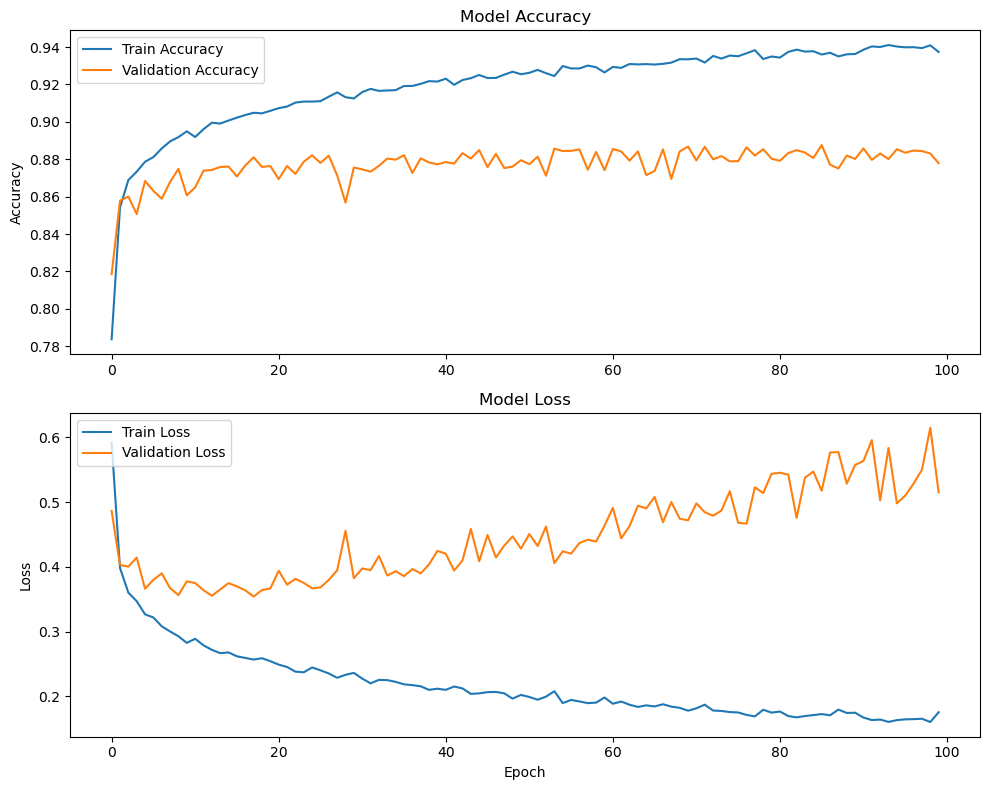

In [68]:
# Visualize the training results
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot training & validation accuracy values
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].legend(loc='upper left')

# Plot training & validation loss values
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Model Loss')
axs[1].legend(loc='upper left')


plt.tight_layout()
plt.show()

In [69]:
# Make predictions
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


313/313 [==============================] - 1s 2ms/step


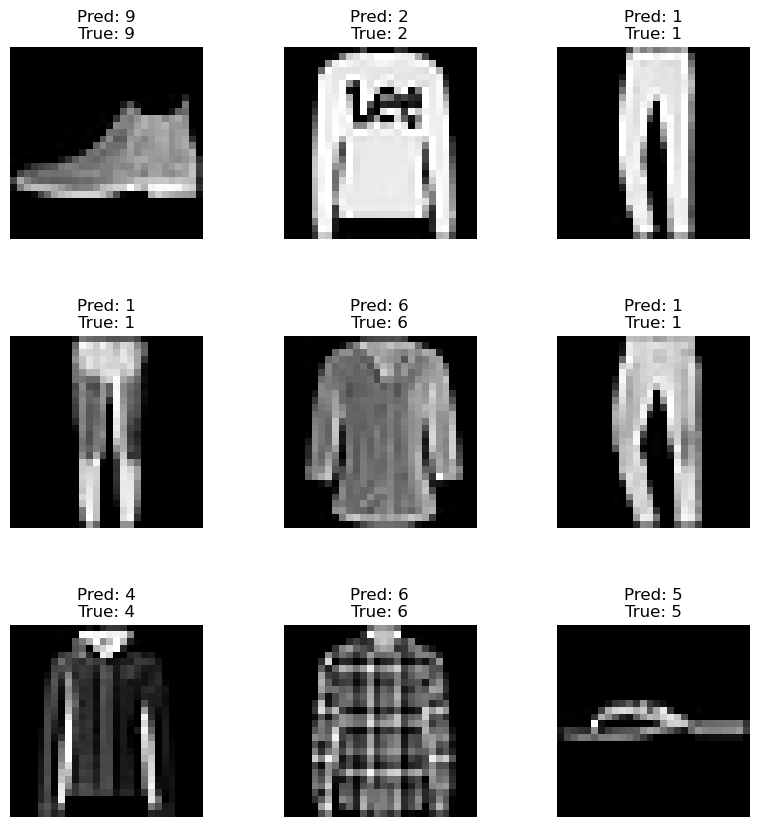

In [72]:
# Plot predicted vs actual results
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Display some of the test images along with predicted and actual labels
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in np.arange(0, 9):
    axes[i].imshow(x_test[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Pred: {y_pred_classes[i]}\nTrue: {y_true[i]}")
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()

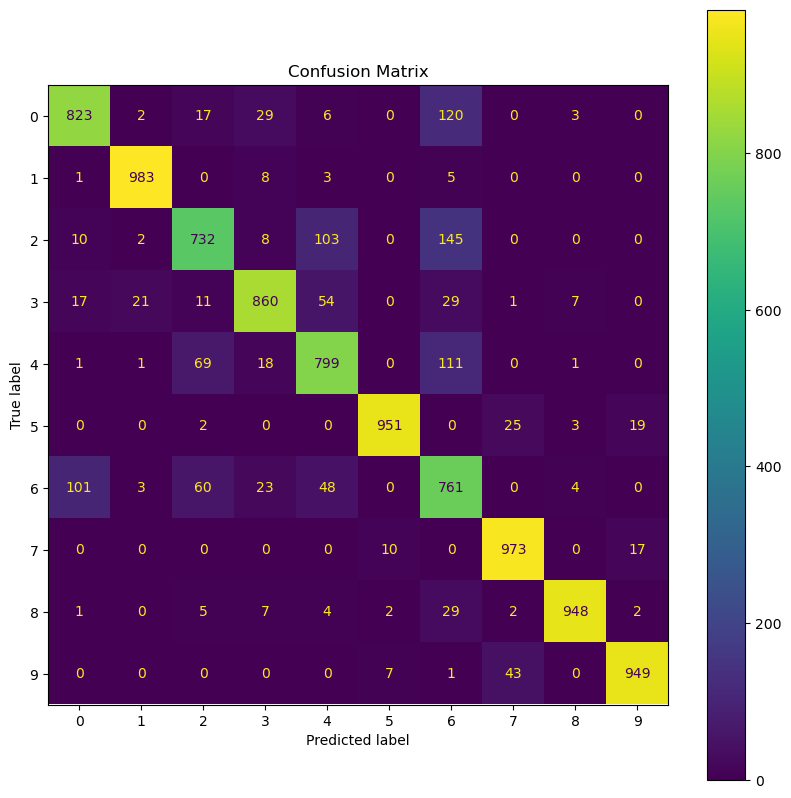

In [73]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=np.arange(10))

fig, ax = plt.subplots(figsize=(10, 10))
cmd.plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()